<a href="https://colab.research.google.com/github/w2j1y12/pdm17/blob/main/py-pandas/pandas_4_visualizing_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [2]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20210927', periods=6)
dates

DatetimeIndex(['2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# head()
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-09-27,0.471435,-1.190976,1.432707,-0.312652
2021-09-28,-0.720589,0.887163,0.859588,-0.636524
2021-09-29,0.015696,-2.242685,1.150036,0.991946
2021-09-30,0.953324,-2.021255,-0.334077,0.002118
2021-10-01,0.405453,0.289092,1.321158,-1.546906
2021-10-02,-0.202646,-0.655969,0.193421,0.553439




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


<BarContainer object of 4 artists>

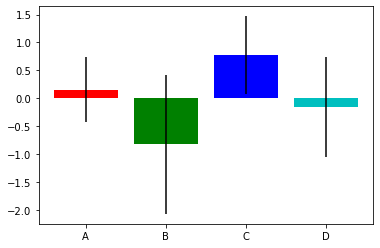

In [5]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbc')
# plt.show()

***

## pandas의 데이터 시각화 (Visualization)

In [6]:
df

,A,B,C,D
2021-09-27,0.471435,-1.190976,1.432707,-0.312652
2021-09-28,-0.720589,0.887163,0.859588,-0.636524
2021-09-29,0.015696,-2.242685,1.150036,0.991946
2021-09-30,0.953324,-2.021255,-0.334077,0.002118
2021-10-01,0.405453,0.289092,1.321158,-1.546906
2021-10-02,-0.202646,-0.655969,0.193421,0.553439


### 꺽은선 그래프

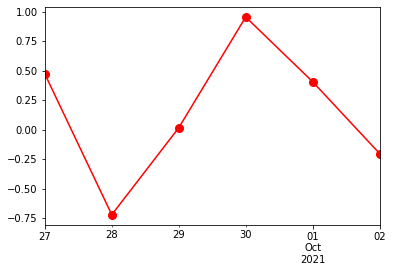

In [10]:
df['A'].plot(marker='o', c='r', ms=8)
plt.show()
# plt.show()하면 위에 글자같은게 사라짐

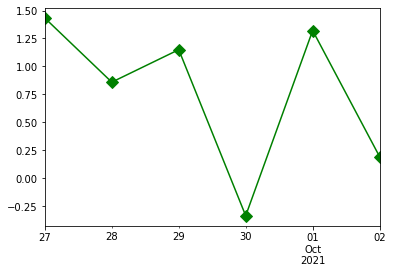

In [12]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize
plt.show()

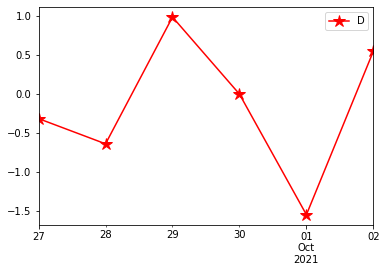

In [13]:
df.plot(y='D', marker='*', c='r', ms=12)   # x-축은 날짜인덱스
# 위에는 데이터 프레임에서 특정 행을 지정해 열의 값을 출력했는데
# 이 그래프는 y축을 D열의 값으로 해서 출력

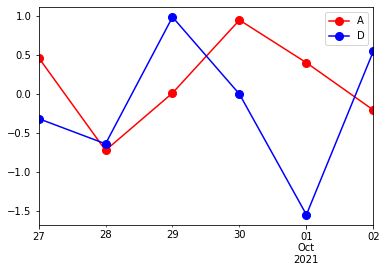

In [22]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8)
# A와 D가 리스트로 묶어야 함
# df[['A','D']].plot(marker='o', c='r', ms=8)  # works!, change colors
df[['A','D']].plot(marker='o', color='rb', ms=8)
# pandas plot multiple markers
# marker 여러 개 넣는 거 해보기

In [ ]:
df.plot(y=['A','C'], marker='o')

### 산포도 (Scatter graph)

In [ ]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32)  

In [ ]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

In [ ]:
df['A'].plot.bar()

In [ ]:
df['D'].plot.bar()

In [ ]:
df.plot(kind='bar', y='D') #, rot=75)

#### 다중 바그래프

In [ ]:
df.plot(kind='bar',y=['A','C','D'])

#### 평균/표준편차 그래프

In [ ]:
df.mean(0), df.std(0), df.columns

In [ ]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0)) #, rot=0) 



---



### 그래프 이어 그리기

In [ ]:
x1 = np.arange(0.0, 5.0, 0.01)
y1 = np.sin(2*np.pi*x1)
plt.figure(figsize=(10,4))
plt.plot(x1, y1, 'o', ms = 4)

In [ ]:
x1.shape, y1.shape

#### pandas 데이터프레임을 이용한 그래프 

In [ ]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])
df.head()

In [ ]:
df.tail()

In [ ]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)]
print(len(pre), len(post))

In [ ]:
post.shape

In [ ]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용

In [ ]:
plt.figure(figsize=(10,5))
